**Author:** Prof. AJ Smit

Department of Biodiversity and Conservation Biology

University of the Western Cape

# Topic 10: Principal Coordinate Analysis (PCoA)

Rather than using raw data as in a CA, PCoA takes a (dis)similarity matrix as input; in other words, any of the dissimilarities calculated by **vegan**’s `vegdist()` function can be used, which is great as they are well-suited to species data. If dissimilarities are Euclidean distances, then PCoA is equal to PCA. Another thing that makes a PCoA more useful is that (dis)similarity matrices calculated from quantitative, semi-quantitative, qualitative, and mixed variables can be handled.

PCoA scaling takes a set of dissimilarities and returns a set of points such that when plotted in 2D or 3D space the distances between the points are approximately equal to the dissimilarities. In other words, it tries to represent species dissimilarities as Euclidian distances.

## Set-up the analysis environment

In [1]:
library(tidyverse)
library(vegan)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7



## The Doubs River data

This time we work with the species data:

In [2]:
spe <- read.csv("../Num_Ecol_R_book_ed1/DoubsSpe.csv")
spe <- dplyr::select(spe, -1)
spe <- dplyr::slice(spe, -8)

## Calculate a suitable dissimilarity matrix

You may or may not want to calculate a dissimilarity index upfront (see below). Here I calculate the Bray-Curtis dissimilarity which is appropriate for abundance data:

In [3]:
spe_bray <- vegdist(spe)

## Do the PCoA

<!-- The **vegan** function `cmdscale()` can be used for PCoA: -->
The book *Numerical Ecology in R* uses a built-in function `cmdscale()` or the function `pcoa()` in **ape** for its PCoA calculation. The **vegan** function `capscale()` can also be used for PCoA, and this is the approach I take here. The 'CAP' in `capscale()` stands for 'Canonical Analysis of Principal Coordinates'. `capscale()` works differently from `rda()` or `cca()` in that we can only specify the input via a formula interface. See `?capscale` for information. To run a PCoA without constraints we use `1` on the righthand side of the formula, with the dissimilarity matrix on the left. Here is how:

In [4]:
# spe_pcoa <- cmdscale(spe_bray, k = nrow(spe) - 1, eig = TRUE)
spe_pcoa <- capscale(spe_bray ~ 1)
spe_pcoa

Call: capscale(formula = spe_bray ~ 1)

              Inertia Rank
Total          6.7621     
Unconstrained  7.0583   17
Imaginary     -0.2963   11
Inertia is squared Bray distance 

Eigenvalues for unconstrained axes:
 MDS1  MDS2  MDS3  MDS4  MDS5  MDS6  MDS7  MDS8 
3.695 1.098 0.710 0.415 0.305 0.192 0.157 0.132 
(Showing 8 of 17 unconstrained eigenvalues)


When we do a `summary()` of the output we see that the results are similar to that of PCA and CA, but the **Species scores** are missing because information about original variables (species) are not available. This is due to the fact that input into `capscale()` is the square (site × site) dissimilarity matrix produced from the species table, not the raw species table itself. Here is the output:

In [5]:
summary(spe_pcoa)


Call:
capscale(formula = spe_bray ~ 1) 

Partitioning of squared Bray distance:
              Inertia Proportion
Total           7.058          1
Unconstrained   7.058          1

Eigenvalues, and their contribution to the squared Bray distance 

Importance of components:
                        MDS1   MDS2   MDS3    MDS4    MDS5    MDS6    MDS7
Eigenvalue            3.6953 1.0985 0.7105 0.41497 0.30456 0.19179 0.15697
Proportion Explained  0.5235 0.1556 0.1007 0.05879 0.04315 0.02717 0.02224
Cumulative Proportion 0.5235 0.6792 0.7798 0.83862 0.88177 0.90894 0.93118
                         MDS8    MDS9   MDS10    MDS11    MDS12   MDS13
Eigenvalue            0.13191 0.12943 0.08668 0.046158 0.038645 0.02746
Proportion Explained  0.01869 0.01834 0.01228 0.006539 0.005475 0.00389
Cumulative Proportion 0.94987 0.96820 0.98048 0.987023 0.992498 0.99639
                         MDS14    MDS15     MDS16     MDS17
Eigenvalue            0.013065 0.007088 0.0040395 0.0013006
Proportion Explain

We can provide the raw species table instead and request that `capscale()` calculates the required dissimilarity indices by automagically calling `vegdist()`. The advantage of this approach is that it adds species scores as weighted sums of (residual) community matrix, whereas only providing the pre-calculated dissimilarity matrix provides no fixed method for adding species scores. **I advocate providing a raw species table to `capscale()` so as to retain the species information**. This avoids many problems later on, such as having to calculate the weighted species scores ourselves.

In [6]:
spe_pcoa <- capscale(spe ~ 1, distance = "bray")
spe_pcoa

Call: capscale(formula = spe ~ 1, distance = "bray")

              Inertia Rank
Total          6.7621     
Unconstrained  7.0583   17
Imaginary     -0.2963   11
Inertia is squared Bray distance 
Species scores projected from ‘spe’ 

Eigenvalues for unconstrained axes:
 MDS1  MDS2  MDS3  MDS4  MDS5  MDS6  MDS7  MDS8 
3.695 1.098 0.710 0.415 0.305 0.192 0.157 0.132 
(Showing 8 of 17 unconstrained eigenvalues)


`summary()` now produces a familiar and more complete output:

In [7]:
summary(spe_pcoa)


Call:
capscale(formula = spe ~ 1, distance = "bray") 

Partitioning of squared Bray distance:
              Inertia Proportion
Total           7.058          1
Unconstrained   7.058          1

Eigenvalues, and their contribution to the squared Bray distance 

Importance of components:
                        MDS1   MDS2   MDS3    MDS4    MDS5    MDS6    MDS7
Eigenvalue            3.6953 1.0985 0.7105 0.41497 0.30456 0.19179 0.15697
Proportion Explained  0.5235 0.1556 0.1007 0.05879 0.04315 0.02717 0.02224
Cumulative Proportion 0.5235 0.6792 0.7798 0.83862 0.88177 0.90894 0.93118
                         MDS8    MDS9   MDS10    MDS11    MDS12   MDS13
Eigenvalue            0.13191 0.12943 0.08668 0.046158 0.038645 0.02746
Proportion Explained  0.01869 0.01834 0.01228 0.006539 0.005475 0.00389
Cumulative Proportion 0.94987 0.96820 0.98048 0.987023 0.992498 0.99639
                         MDS14    MDS15     MDS16     MDS17
Eigenvalue            0.013065 0.007088 0.0040395 0.0013006
Prop

We can unpack what is inside the results, and there we can see that we can access the eigenvalues as we did for PCA and CA:

In [8]:
# str(spe_pcoa) # not shown due to length of output

The percentage inertia explained by the first three axes is therefore:

In [9]:
round(sum(spe_pcoa$CA$eig[1:3]) / sum(spe_pcoa$CA$eig) * 100, 2)

[1] 77.98

See *Numerical Ecology in R* for details (pp. 140 to 145) for information about the interpretation of a PCoA and the ordination diagrams shown below.

## Ordination diagrams

We create the ordination diagrammes as before:

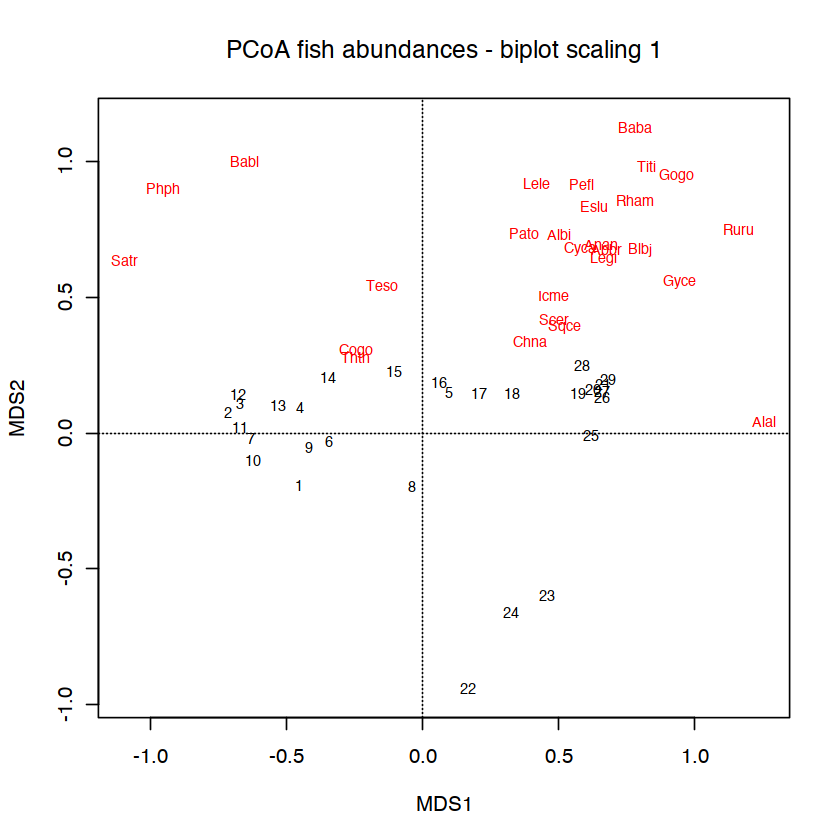

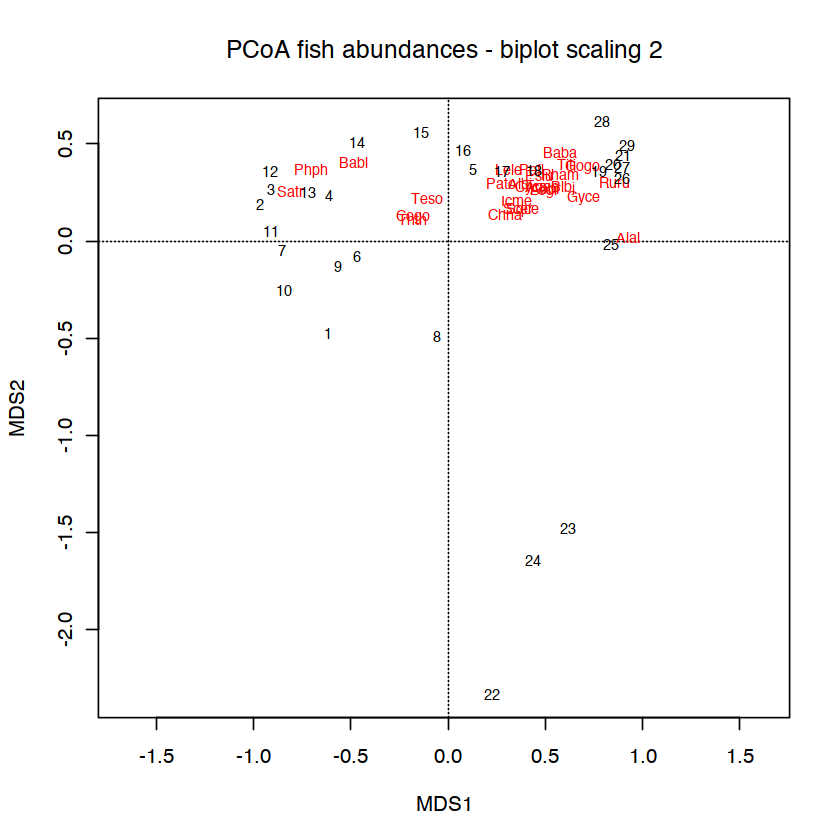

In [10]:
plot(spe_pcoa, scaling = 1, main = "PCoA fish abundances - biplot scaling 1")
plot(spe_pcoa, scaling = 2, main = "PCoA fish abundances - biplot scaling 2")

The plots above work okay, but we can improve them. Note that you can also apply these improvements to PCA and CA ordinations. Let us build plots from scratch:

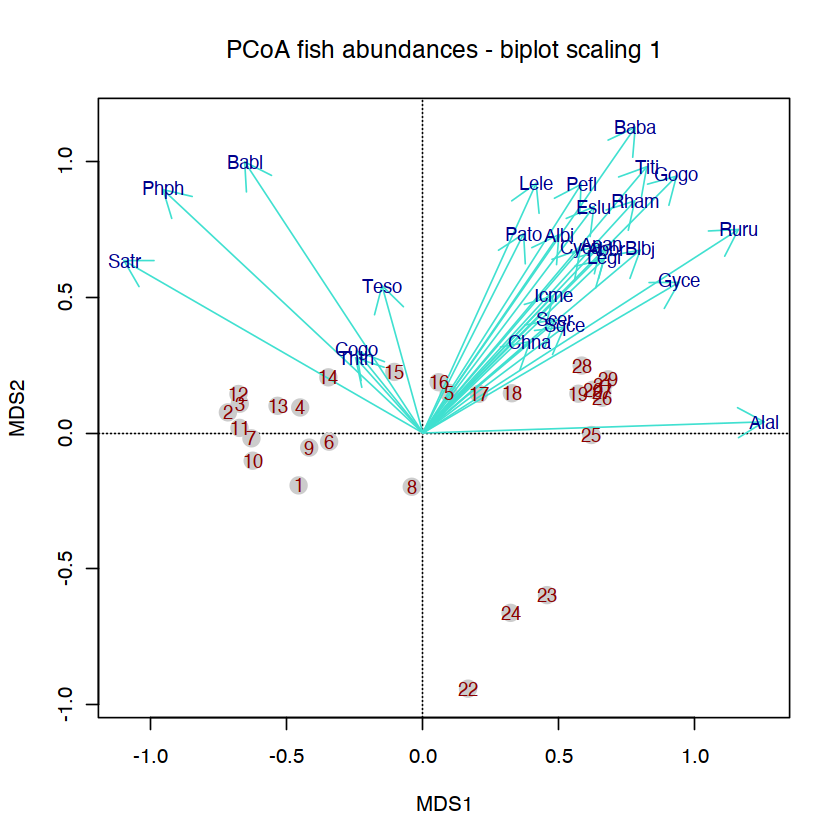

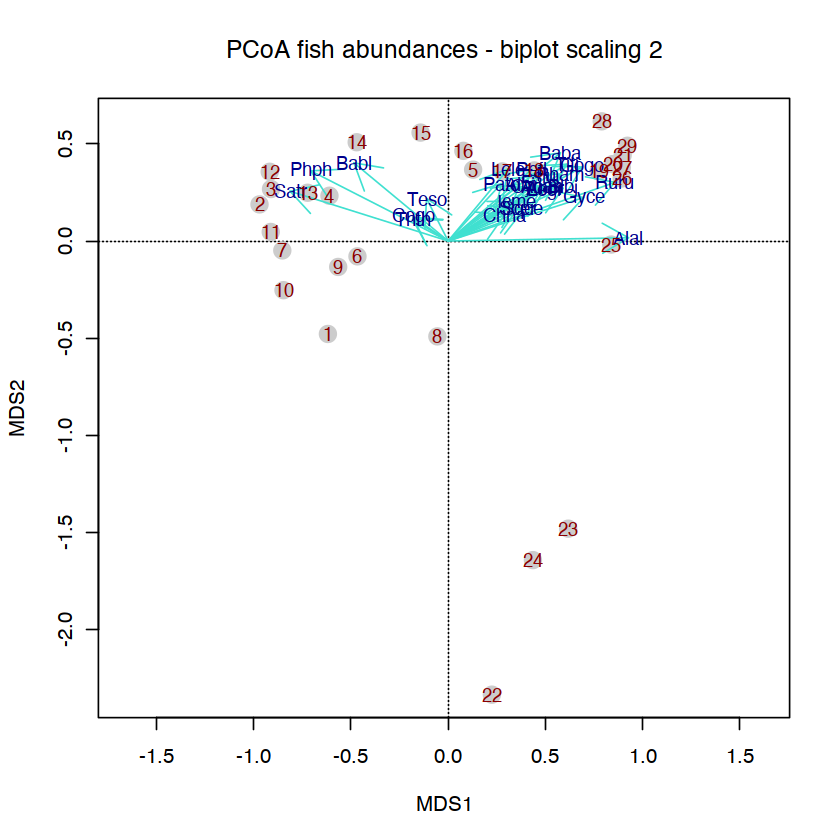

In [11]:
pl1 <- ordiplot(spe_pcoa, type = "none", scaling = 1, main = "PCoA fish abundances - biplot scaling 1")
points(pl1, "sites", pch = 21, cex = 1.75, col = "grey80", bg = "grey80")
points(pl1, "species", pch = 21, col = "turquoise", bg = "yellow", arrows = TRUE)
text(pl1, "species", col = "blue4", cex = 0.9)
text(pl1, "sites", col = "red4", cex = 0.9)

pl2 <- ordiplot(spe_pcoa, type = "none", scaling = 2, main = "PCoA fish abundances - biplot scaling 2")
points(pl2, "sites", pch = 21, cex = 1.75, col = "grey80", bg = "grey80")
points(pl2, "species", pch = 21, col = "turquoise", bg = "yellow", arrows = TRUE)
text(pl2, "species", col = "blue4", cex = 0.9)
text(pl2, "sites", col = "red4", cex = 0.9)